In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.shape

(167, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
# df[df.duplicated()] - To show all duplicated rows present
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [12]:
# df.drop_duplicates() - To drop all the duplicated values

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


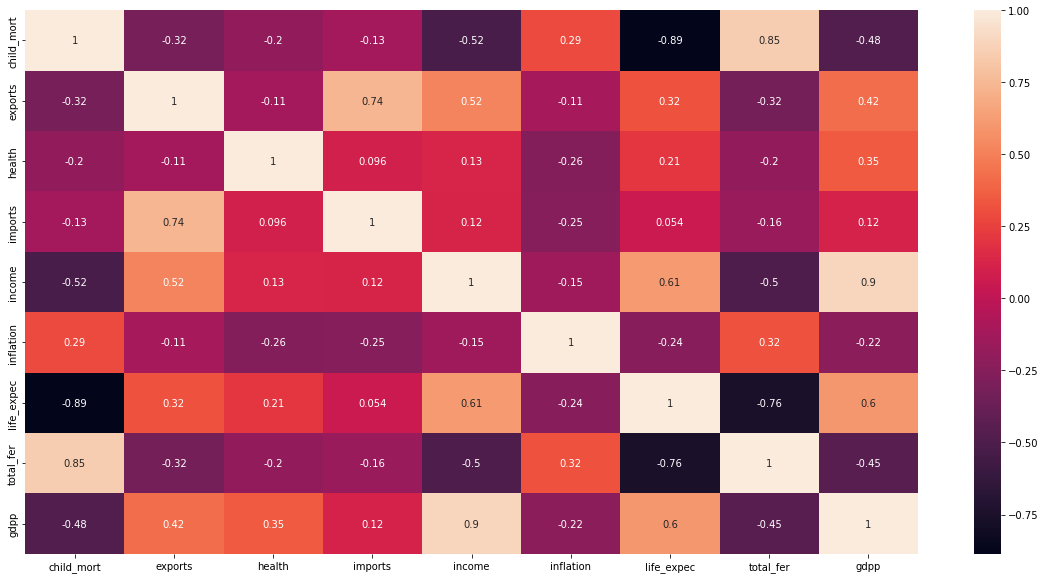

In [7]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

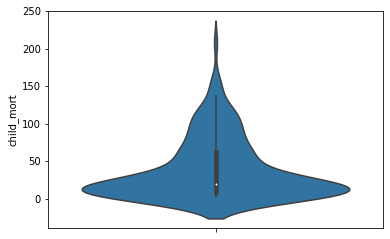

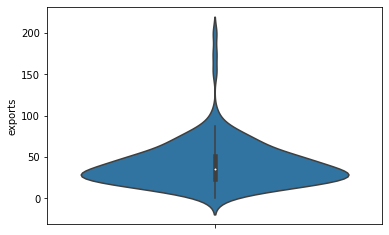

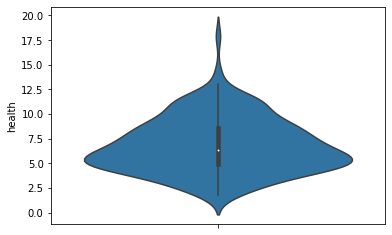

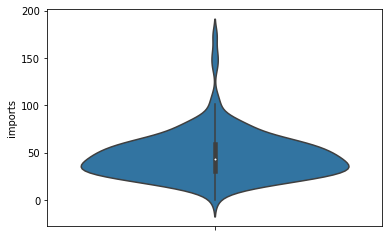

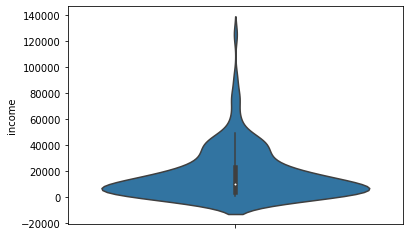

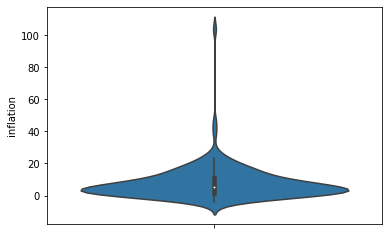

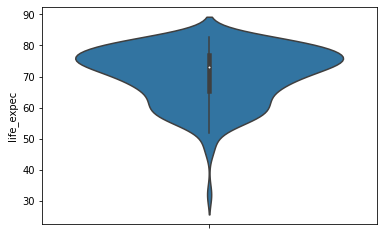

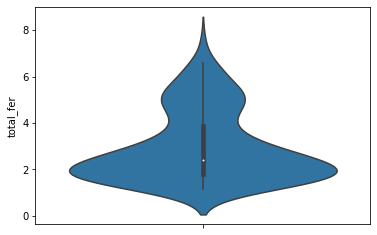

In [103]:
cols = list(df_new.columns)
for col in cols:
  sns.violinplot(y=df[col])
  plt.show()

In [17]:
df_new = df.drop(columns=['country','gdpp'])
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13


In [18]:
# Observation - Mean(the column or all the observations) / Std Deviation of it
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_new),columns = df_new.columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944


In [20]:
# Always best practice to have a copy of your scaled data because sometimes you might lose it during model creation and if that happens you've to again scale your data. Hence to avoid that it's better to have a scaled copy of your data!
df_scaled_copy = df_scaled.copy(deep=True)
df_scaled_copy

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944


In [42]:
sse = []
for k in range (1,10):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_scaled)
  sse.append(kmeans.inertia_)
  print(kmeans.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1336.0000000000005
920.766403131161
774.1434119082389
657.7770477963131
589.8790583293346


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


510.0370874009145
451.38801966557105
404.5746532606554
377.91947717699725


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


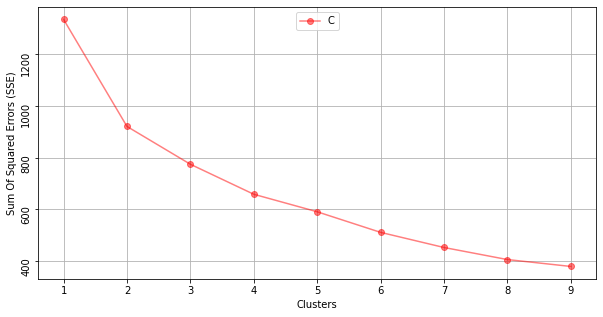

In [43]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,10)),sse,marker='o',alpha=0.5,color='red')
plt.xlabel('Clusters')
plt.ylabel('Sum Of Squared Errors (SSE)')
plt.yticks(rotation=90)
plt.legend('Curve',loc='upper center')
plt.grid(True)
plt.show()

In [46]:
# Silhouette Score calculation
# It is the score measure of distance between each clusters and the most optimal or best value is 1 and worst value is -1 while 0 being the average value.
# More closer the silhouette score to 1 the better is the model for the particular value of cluster K
sil = []
for k in range(2,10):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_scaled)
  labels = kmeans.predict(df_scaled)
  sil.append(silhouette_score(df_scaled,labels))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

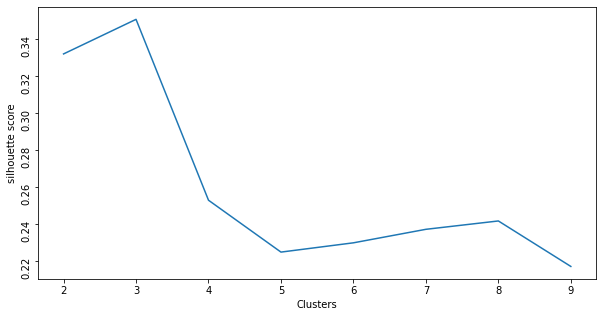

In [47]:
plt.figure(figsize=(10,5))
plt.plot(list(range(2,10)),sil)
plt.xlabel('Clusters')
plt.ylabel('silhouette score')
plt.yticks(rotation=90)
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 3,random_state=1).fit(df_scaled)
df['KMeans_Labels'] = kmeans.predict(df_scaled)
df

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [54]:
mean = df.groupby('KMeans_Labels').mean()
median = df.groupby('KMeans_Labels').median()
df_compare = pd.concat([mean,median],axis=0)
df_compare.index = ['g0 mean', 'g1 mean', 'g2 mean', 'g0 median', 'g1 median', 'g2 median']
df_compare.T

,g0 mean,g1 mean,g2 mean,g0 median,g1 median,g2 median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36
gdpp,16937.535714,1832.884615,57566.666667,8580.000,932.00,46600.00


In [61]:
category = []
for index, row in df.iterrows():
  if(row['KMeans_Labels'] == 0):
    category.append('Developing')
  elif(row['KMeans_Labels'] == 1):
    category.append('Under-Developed')
  else:
    category.append('Developed')
df['Category'] = category
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,Category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under-Developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under-Developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,Under-Developed


In [62]:
df[df['Category'] == 'Developed']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,Category
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2,Developed
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2,Developed
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2,Developed


In [63]:
df[df['Category'] == 'Developing']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,Category
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0,Developing
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,Developing
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,Developing
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing


In [65]:
df[df['Category'] == 'Under-Developed']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,Category
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,Under-Developed
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1,Under-Developed
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,Under-Developed
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1,Under-Developed
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,Under-Developed
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,Under-Developed
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,Under-Developed
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,Under-Developed
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,Under-Developed
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1,Under-Developed


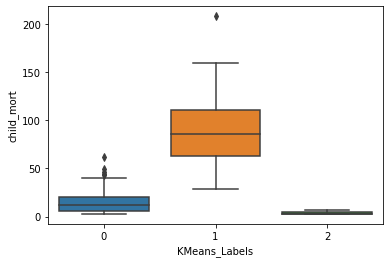

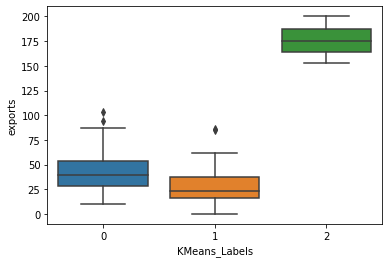

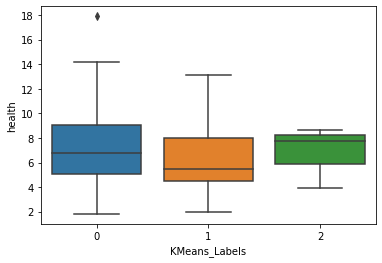

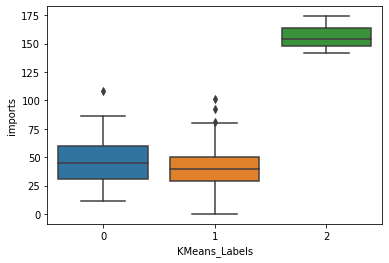

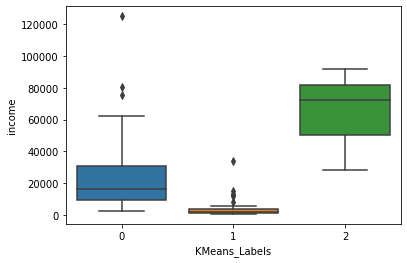

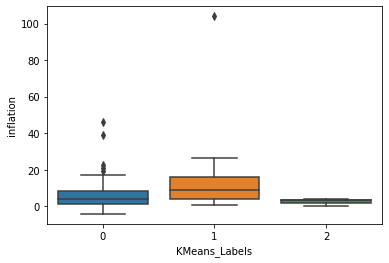

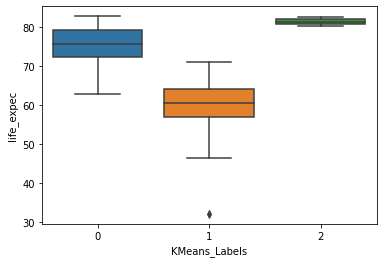

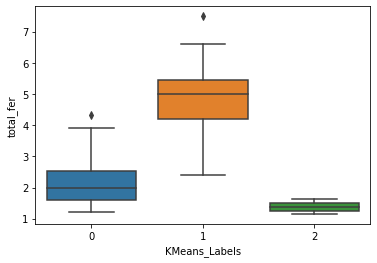

In [72]:
cols = list(df_new.columns)
for col in cols:
  sns.boxplot(x='KMeans_Labels',y=col, data=df)
  plt.show()

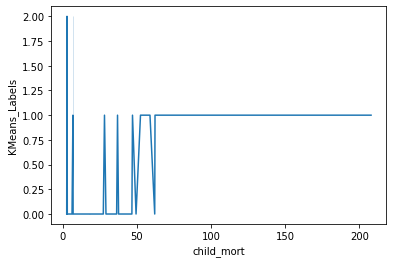

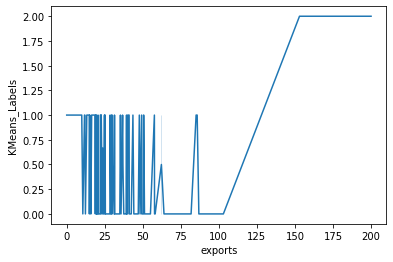

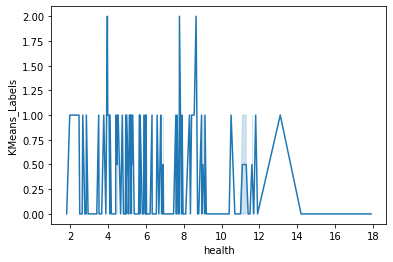

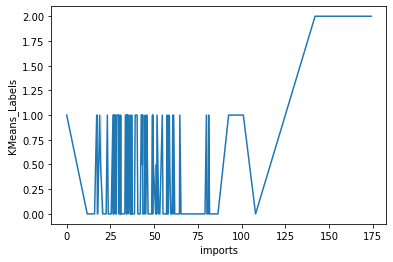

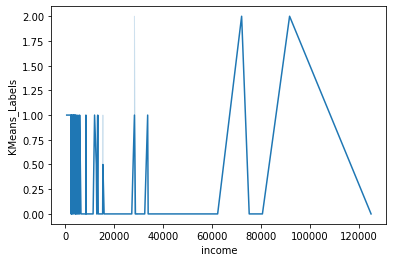

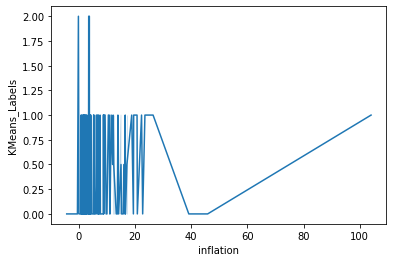

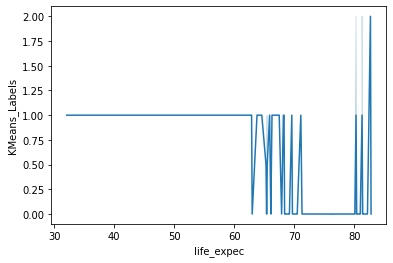

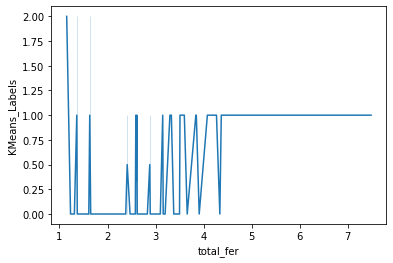

In [75]:
cols = list(df_new.columns)
for col in cols:
  sns.lineplot(data=df, x= col, y='KMeans_Labels')
  plt.show()

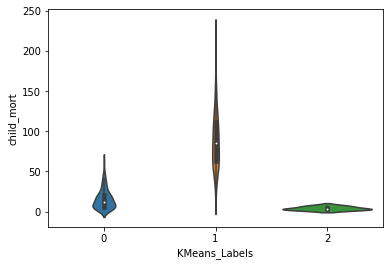

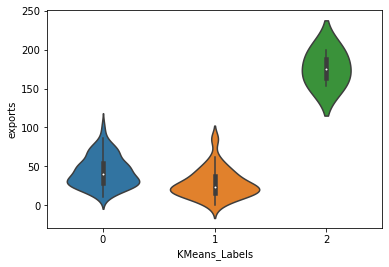

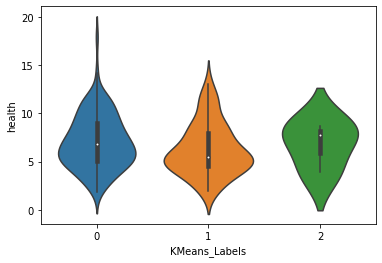

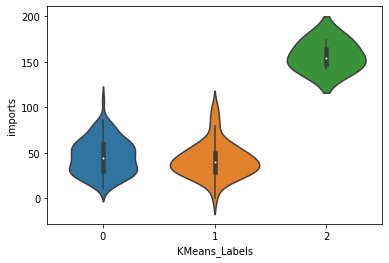

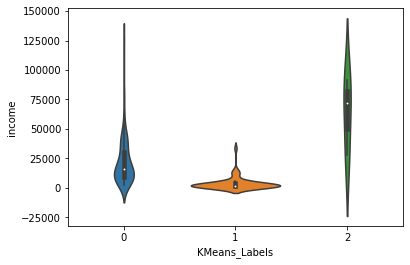

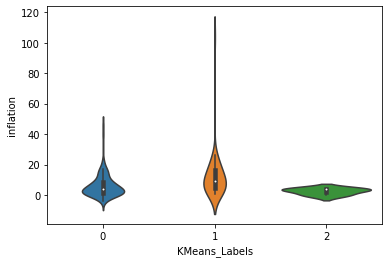

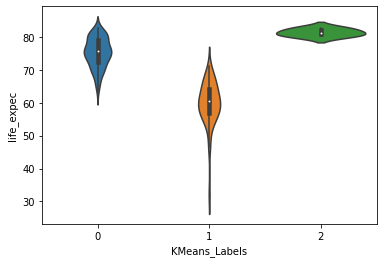

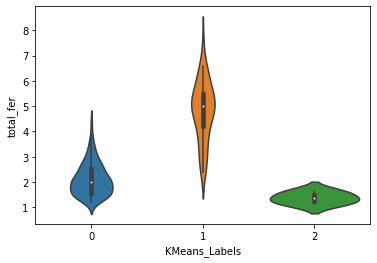

In [78]:
cols = list(df_new.columns)
for col in cols:
  sns.violinplot(data=df, x= 'KMeans_Labels', y=col)
  plt.show()

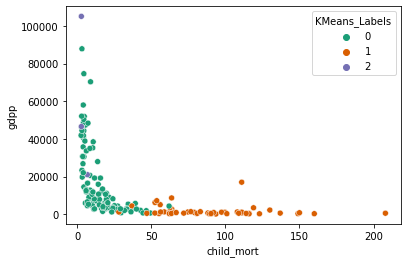

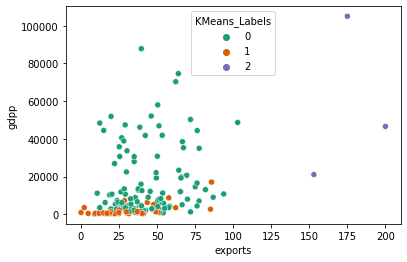

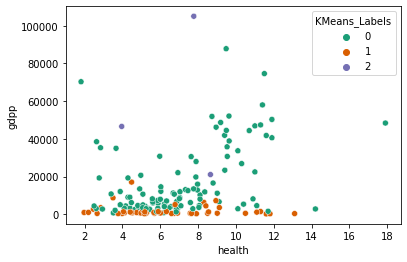

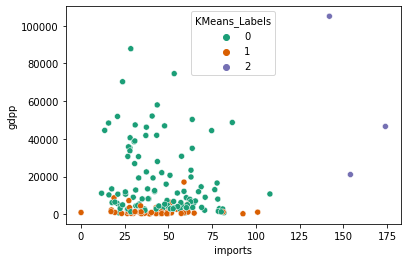

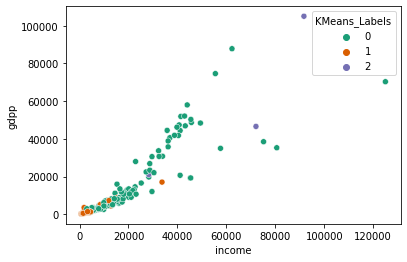

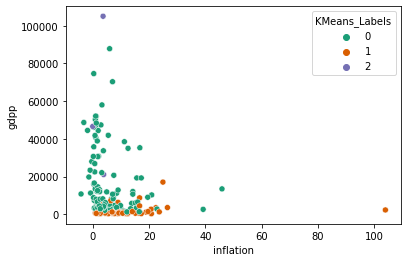

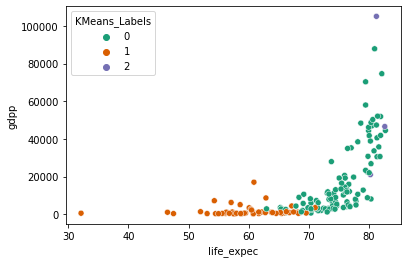

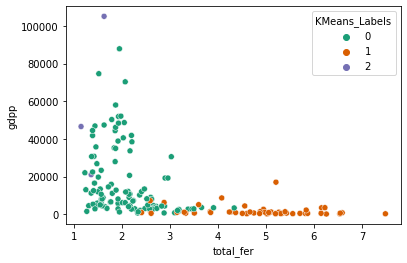

In [82]:
cols = list(df_new.columns)
for col in cols:
  sns.scatterplot(data = df, x=col, y='gdpp', hue='KMeans_Labels', palette='Dark2')
  plt.show()

ValueError: ignored

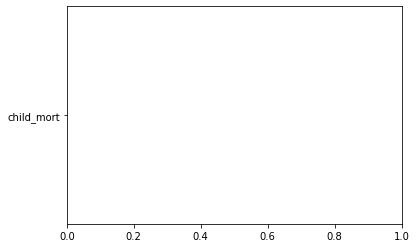

In [102]:
cols = list(df_new.columns)
for col in cols:
  plt.scatter(df['KMeans_Labels'],col)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
  plt.show()